In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import random
import matplotlib.font_manager as fm

In [2]:
hotWord_all = pd.read_csv('CVPR/hotWords16-20_des.csv',header=None, names=['word', 'num'])

In [16]:
hotWord_all.info

<bound method DataFrame.info of                word   num
0          Learning  1028
1             Image   599
2              Deep   577
3          Networks   486
4           Network   424
...             ...   ...
6627           You:     1
6628  Zero-Exemplar     1
6629     ZigZagNet:     1
6630         Zigzag     1
6631       spectral     1

[6632 rows x 2 columns]>

In [4]:
hotWord_dict = hotWord_all.set_index(['word'])['num'].to_dict()

In [5]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h  = random.randint(120,250)
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * float(random.randint(60, 120)) / 255.0)
        return "hsl({}, {}%, {}%)".format(h, s, l)

In [6]:
wc = wordcloud.WordCloud(
    font_path='TIMES.TTF',
    background_color='white',
    width=2000,height=1200,
    max_words=350,
    max_font_size=500,
    #color_func=random_color_func
)

In [7]:
wc.generate_from_frequencies(hotWord_dict)

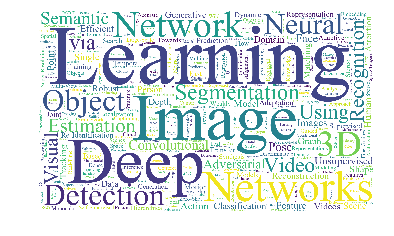

In [8]:
plt.imshow(wc)
plt.axis('off')
plt.savefig('hotwordcloud.png',dpi=600)
plt.show()
# plt.close()

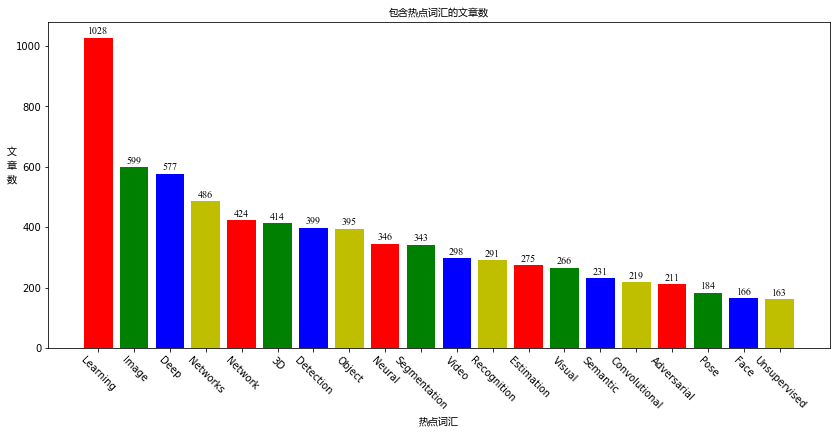

In [9]:
fig = plt.figure(figsize=(14,6))
YaHei = fm.FontProperties(fname='MSYH.TTC')
TNR = fm.FontProperties(fname='TIMES.TTF')
hotWordTop20 = []
hotWordTop20_num = []
stopword = ['via', 'Using']
for i, (word, num) in enumerate(hotWord_dict.items()):
    if word in stopword:
        continue
    plt.text(word, num+5, num, ha='center', va='bottom', fontsize=8, fontproperties=TNR)#+0.05 表示高于图0.0
    hotWordTop20.append(word)
    hotWordTop20_num.append(num)
    if len(hotWordTop20)==20:
        break

plt.bar(hotWordTop20,hotWordTop20_num,color='rgby')
plt.title('包含热点词汇的文章数',fontproperties=YaHei) # 标题
plt.xlabel('热点词汇',fontproperties=YaHei) # x轴标签
plt.xticks(rotation=-45)
plt.ylabel('文\n章\n数',fontproperties=YaHei,rotation='horizontal') # y轴标签
plt.savefig('top10Word.png',dpi=600)
# plt.tight_layout()
plt.show()

In [10]:
authors_all = pd.read_csv('CVPR/authors_all_DES.csv',header=None, names=['authors', 'num'])

In [15]:
authors_all.info

<bound method DataFrame.info of               authors  num
0       Xiaogang Wang   58
1     Ming-Hsuan Yang   52
2        Luc Van Gool   48
3             Qi Tian   46
4             Wei Liu   45
...               ...  ...
8574         Zitao Mo    1
8575        Ziyu Guan    1
8576      Zoltan Kato    1
8577      Zongqiao Yu    1
8578     Zongwei Zhou    1

[8579 rows x 2 columns]>

In [12]:
authors_dict = authors_all.set_index(['authors'])['num'].to_dict()

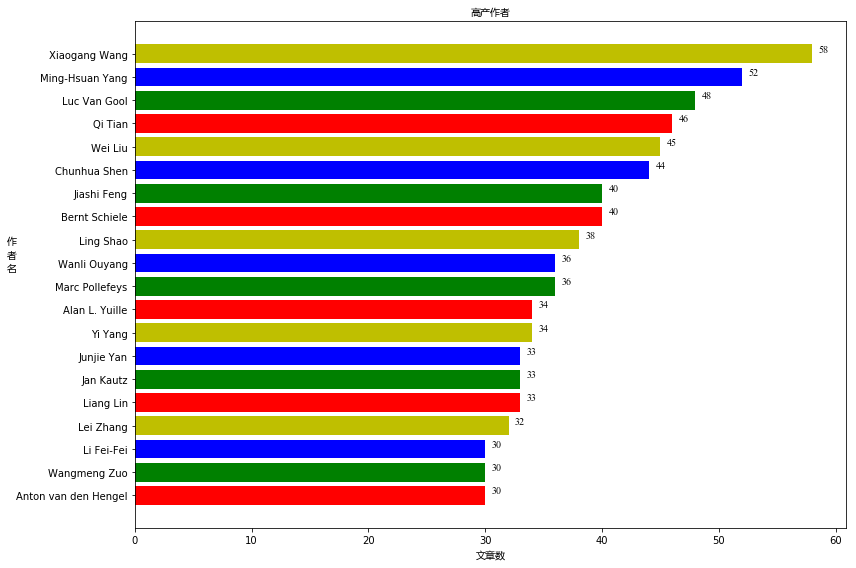

In [14]:
fig2 = plt.figure(figsize=(12,8))
authorsTop20 = []
authorsTop20_num = []

for i, (author, num) in enumerate(authors_dict.items()):
    plt.text(num+1,author, num, ha='center', va='bottom', fontsize=8, fontproperties=TNR)#+0.05 表示高于图0.0
    authorsTop20.append(author)
    authorsTop20_num.append(num)
    if i==19:
        break

plt.barh(authorsTop20[::-1],authorsTop20_num[::-1],color='rgby') # 从大到小画图
plt.title('高产作者',fontproperties=YaHei) # 标题
plt.ylabel('作\n者\n名',fontproperties=YaHei,rotation='horizontal') # y轴标签
plt.xlabel('文章数',fontproperties=YaHei) # x轴标签
plt.savefig('top10authors.png',dpi=600, bbox_inches="tight")
plt.tight_layout()
plt.show()